In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing Data & First Impressions

In [6]:
file_path = r'C:\Users\Erik\OneDrive\Desktop\Portfolio Stuff\student_performance_prediction.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_rows', 40010)
df.head(10)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
7,S00008,13.8,95.8,59.2,Yes,Doctorate,No
8,S00009,7.7,100.1,91.9,No,Bachelor,Yes
9,S00010,12.7,38.4,37.8,Yes,High School,NaN


In [7]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [9]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

## Notes on raw data
#### 1. Minimum Study Hours per Week & Attendance Rate appear negative (should be impossible as one can't have negative numbers in these fields)
Will leave this but would contact client about possible solutions for this include : 
1. Removing the negative numbers data
2. Replacing all negative numbers to 0
3. Replacing all negative numbers to absolute values of said numbers

#### 2. Quite a bit of null data. We are focusing on columns that are numerical types
Will leave the categorical columns alone. As for the numerical columns, we will be filling the null values with the respected mean of the appropriate columns.

## Cleaning Data and First Correlation

In [11]:
mean_value_study = df['Study Hours per Week'].mean()

mean_value_attendance = df['Attendance Rate'].mean()

mean_value_grades = df['Previous Grades'].mean()

df['Study Hours per Week'].fillna(value=mean_value_study, inplace=True)
df['Attendance Rate'].fillna(value=mean_value_attendance, inplace=True)
df['Previous Grades'].fillna(value=mean_value_grades, inplace=True)


In [13]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

Isolating the three numerical columns to see the correlation between them

In [14]:
numeric_columns = df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']]

In [16]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Study Hours per Week,Attendance Rate,Previous Grades
Study Hours per Week,1.000000,0.004417,0.000559
Attendance Rate,0.004417,1.000000,-0.004787
Previous Grades,0.000559,-0.004787,1.000000


##### Not much of a correlation between these three columns

## Visualization

<Figure size 720x576 with 0 Axes>

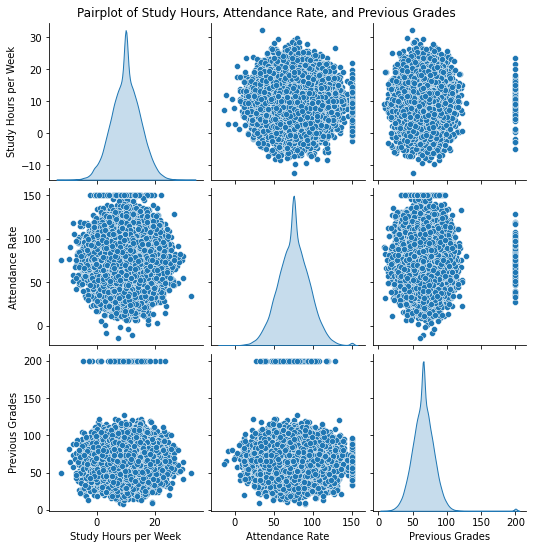

In [17]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']], diag_kind='kde', kind='scatter')
plt.suptitle('Pairplot of Study Hours, Attendance Rate, and Previous Grades', y=1.01)
plt.show()

These diagrams show the correlation between the numerical columns.

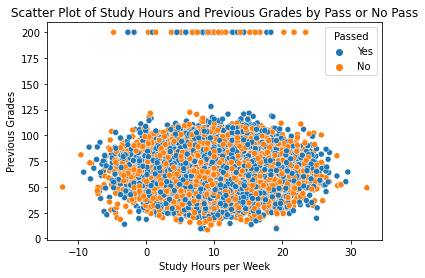

In [18]:
sns.scatterplot(data = df, x = 'Study Hours per Week', y = 'Previous Grades', hue = 'Passed')
plt.title('Scatter Plot of Study Hours and Previous Grades by Pass or No Pass')
plt.show()

Suprised that not all that had 200 in their previous grades passed the following year.

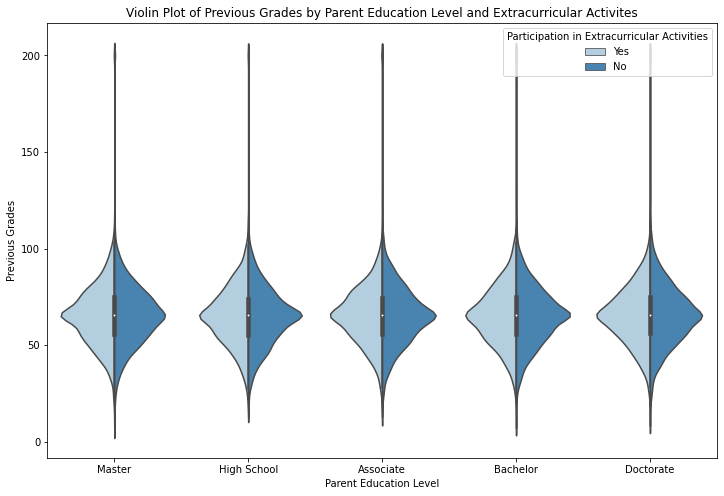

In [24]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'Parent Education Level', y = 'Previous Grades', hue = 'Participation in Extracurricular Activities', palette='Blues', data=df, split = True)
plt.title('Violin Plot of Previous Grades by Parent Education Level and Extracurricular Activites')
plt.xlabel('Parent Education Level')
plt.ylabel('Previous Grades')
plt.show()

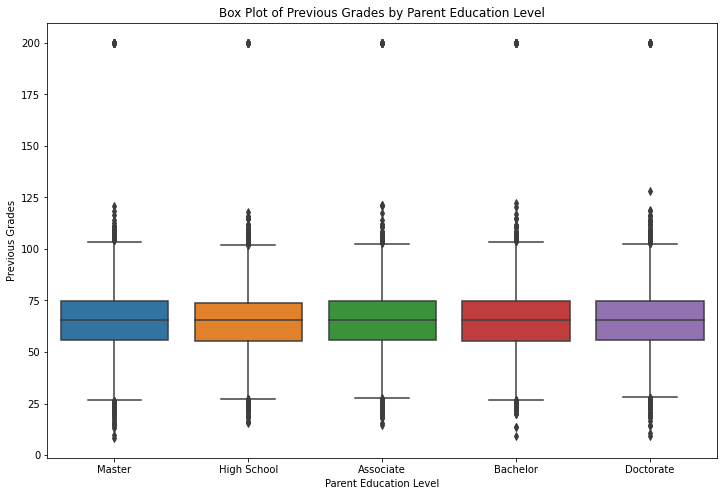

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Parent Education Level', y = 'Previous Grades', data=df)
plt.title('Box Plot of Previous Grades by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Previous Grades')
plt.show()

Hugh gap from 200 to 125. Outliers show from 0-25 and 105-200.

<Figure size 720x576 with 0 Axes>

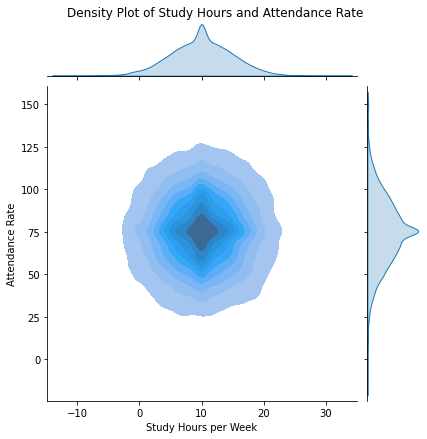

In [28]:
plt.figure(figsize=(10, 8))
sns.jointplot(x = 'Study Hours per Week', y = 'Attendance Rate', data = df, kind = 'kde', fill = True)
plt.suptitle('Density Plot of Study Hours and Attendance Rate', y =1.01)
plt.show()

Density Plot shows the general area where the Attendance Rate and Study Hours Per Week correspond with each other. Hot spot shows around 75% attendance rate and 10 Hours of Studying per week.

## Analysis and Suggestions

No real correlation between any columns in this data. Previous Grades, Parent Education level, Attendance, and Studying doesn't seem to correlate if the student passed the class.

Data looks to be mixed. Would speak to client about the following concerns about the data or ask for updated data if available.
Concerns:
1. Negative Study Hours/Attendance Rate
2. The amount of students that received 200% and that majority of them did not even pass the next year.
3. Normally Studying more hours and having a higher attendance rate generally would increase your chances to pass however this doesn't seem the case here.

##### Would suggest to continue keeping track of the same students for the next year. Create another Previous Grade and change the new passed column with the students current grade to show three different grades.